In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2*

In [2]:
import fastai
import fastai.basics as fai
import fastai.collab as fc
import fastai.tabular as ft

from pathlib import Path
from shutil import copyfile
import random
import gc

import torch
import torch.nn.functional as F
import torch.nn as nn

import torchvision
import torchvision.utils as utils
import torchvision.models
from torch.utils.data import DataLoader, Dataset

from tqdm import tqdm_notebook as tqdm

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
path = Path("data/")

In [4]:
ratings = pd.read_csv(path/"rating.csv")

In [ ]:
ratings.head()

In [5]:
ratings = ratings[ratings['rating'] != -1]

In [ ]:
ratings.head()

In [6]:
animes = pd.read_csv(path/"anime.csv")

In [ ]:
animes.head()

In [7]:
ratings = ratings.merge(animes[["anime_id", "name"]])

In [ ]:
ratings.shape

In [ ]:
fc.CollabDataBunch.from_df??

In [8]:
data = fc.CollabDataBunch.from_df(ratings, seed=13, pct_val=0.1, item_name="name", bs=512)

In [ ]:
data.show_batch()

In [9]:
y_range = [-0.5,10.5]

# Weight Decay removed :O

In [10]:
learner = fc.collab_learner(data, n_factors = 100, use_nn = False, y_range=y_range)

In [ ]:
learner.model

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.45E-01


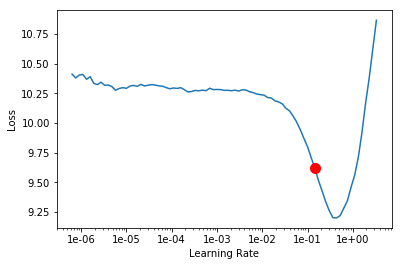

In [11]:
learner.lr_find(); learner.recorder.plot()

In [ ]:
data.batch_size

In [12]:
learner.fit_one_cycle(1,2e-1)

epoch,train_loss,valid_loss


KeyboardInterrupt: 

In [ ]:
learner.lr_find(); learner.recorder.plot()

In [ ]:
learner.fit_one_cycle(1,1e-5)

In [ ]:
learner.lr_find(); learner.recorder.plot()

In [ ]:
learner.fit_one_cycle(1,1e-6)

In [ ]:
learner.save('anime')

In [12]:
learner.load('anime');

In [ ]:
torch.save(data,path/"data.feather")

In [13]:
animes_num_ratings = ratings.groupby('name')['rating'].count()

In [ ]:
animes_num_ratings.head()

In [14]:
animes_num_ratings = animes_num_ratings.sort_values(ascending=False)

In [ ]:
animes_num_ratings.head(20)

In [ ]:
animes_num_ratings.tail(10)

In [15]:
most_watched = animes_num_ratings.index.values[:500]

In [ ]:
most_watched[:10]

In [ ]:
most_watched[-10:]

In [ ]:
animes.head()

In [16]:
animes.sort_values('rating',ascending=False).head(15)

,anime_id,name,genre,type,episodes,rating,members
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13
10400,30120,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,Unknown,9.60,47
9595,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
9078,33607,Kahei no Umi,Historical,Movie,1,9.33,44
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
10786,26313,Yakusoku: Africa Mizu to Midori,"Drama, Kids",OVA,1,9.25,53
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [17]:
A=animes.sort_values('rating',ascending=False)

In [18]:
A[A['members'] > 1000].head(20)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534


In [19]:
_,anime_names = learner.data.train_ds.x.classes.values()

In [20]:
anime_names

array(['#na#', '&quot;0&quot;', '&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu',
       '&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi', ..., 'xxxHOLiC Movie: Manatsu no Yoru no Yume',
       'xxxHOLiC Rou', 'xxxHOLiC Shunmuki', '◯'], dtype=object)

In [21]:
anime2id = {anime:i for i,anime in enumerate(anime_names)}

In [22]:
anime2id["Death Note"]

1670

In [23]:
torch.save(anime2id,"anime2id.feather")

In [ ]:
most_watched_idx = [anime2id[name] for name in most_watched]

In [ ]:
anime_bias = learner.model.i_bias(torch.tensor(most_watched_idx).cuda())

In [ ]:
anime_bias = anime_bias.squeeze()

In [ ]:
anime_bias[:4]

In [ ]:
mean_ratings = ratings.groupby("name")['rating'].mean()

In [ ]:
mean_ratings.head()

In [ ]:
bias_anime_rating = [(b.item(), a, mean_ratings.loc[a]) for a,b in zip(most_watched,anime_bias)]

In [ ]:
bias_anime_rating[:3]

In [ ]:
sorted(bias_anime_rating, key=lambda x: x[0], reverse=True)[:20]

In [ ]:
sorted(bias_anime_rating, key=lambda x: x[0])[:20]

In [ ]:
most_watched = most_watched[:200]

In [ ]:
anime_weights = learner.weight(most_watched, is_item=True)
anime_weights.shape

In [ ]:
anime_pca = anime_weights.pca(3)
anime_pca.shape

In [ ]:
def altos_y_bajos_en_eje(eje):
    anime_comp = [(f, i) for f,i in zip(anime_pca.t()[eje], most_watched)]
    L = sorted(anime_comp, key=lambda x: x[0], reverse=True)
    return L[:10], L[-10:]

In [ ]:
altos_y_bajos_en_eje(0)

In [ ]:
altos_y_bajos_en_eje(1)

In [ ]:
altos_y_bajos_en_eje(2)